In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv
/kaggle/input/summeranalytics2020/train.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
pd.set_option("display.max_columns", None)

In [3]:
train = pd.read_csv("../input/summeranalytics2020/train.csv", index_col= "Id")
test = pd.read_csv("../input/summeranalytics2020/test.csv")
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [4]:
train.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

- **No missing values. Great!**

In [5]:
train.duplicated().sum()

628

- **We need to remove these duplicates else it will skew our analysis.**

In [6]:
train.drop_duplicates(inplace= True)

In [7]:
train.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,36.883,9.125052,18.0,30.0,36.0,43.00,60.0
Attrition,1000.0,0.157,0.363983,0.0,0.0,0.0,0.00,1.0
DistanceFromHome,1000.0,9.145,8.120956,1.0,2.0,7.0,13.00,29.0
Education,1000.0,2.912,1.028257,1.0,2.0,3.0,4.00,5.0
EmployeeNumber,1000.0,1020.605,606.009713,1.0,491.0,1008.0,1569.75,2068.0
EnvironmentSatisfaction,1000.0,2.728,1.095087,1.0,2.0,3.0,4.00,4.0
JobInvolvement,1000.0,2.727,0.703538,1.0,2.0,3.0,3.00,4.0
JobSatisfaction,1000.0,2.745,1.085889,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1000.0,6464.418,4685.919516,1009.0,2874.0,4877.5,8393.00,19999.0
NumCompaniesWorked,1000.0,2.704,2.490499,0.0,1.0,2.0,4.00,9.0


- **Behaviour has 0 variance. Strange!**

In [9]:
train.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeNumber             1000
EnvironmentSatisfaction       4
Gender                        2
JobInvolvement                4
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               941
NumCompaniesWorked           10
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
StockOptionLevel              4
TotalWorkingYears            39
TrainingTimesLastYear         7
YearsAtCompany               36
YearsInCurrentRole           19
YearsSinceLastPromotion      16
YearsWithCurrManager         18
CommunicationSkill            5
Behaviour                     1
dtype: int64

- **Okay let's Drop Behaviour.**

In [10]:
train.drop("Behaviour", axis= "columns", inplace= True)
test.drop("Behaviour", axis= "columns", inplace= True)

In [11]:
train.shape

(1000, 27)

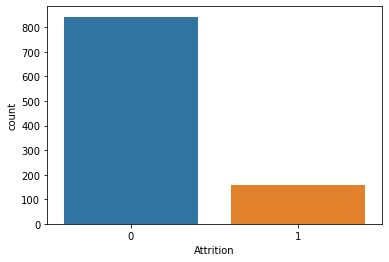

In [12]:
sns.countplot(x= "Attrition", data= train)

- **The data is highly imbalanced. We have to do oversampling before building our model to prevent skewed results.**

# EDA and Feature Selection

In [13]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill'],
      dtype='object')

In [14]:
nominal_variables = train.select_dtypes(include= "object").columns.to_list()
continuous_variables = ['Age','DistanceFromHome','EmployeeNumber','MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
ordinal_variables = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','Education','CommunicationSkill','PerformanceRating','StockOptionLevel']

print (len(nominal_variables), len(continuous_variables), len(ordinal_variables))
len(nominal_variables + continuous_variables + ordinal_variables)

7 12 7


26

## Continuous Variables

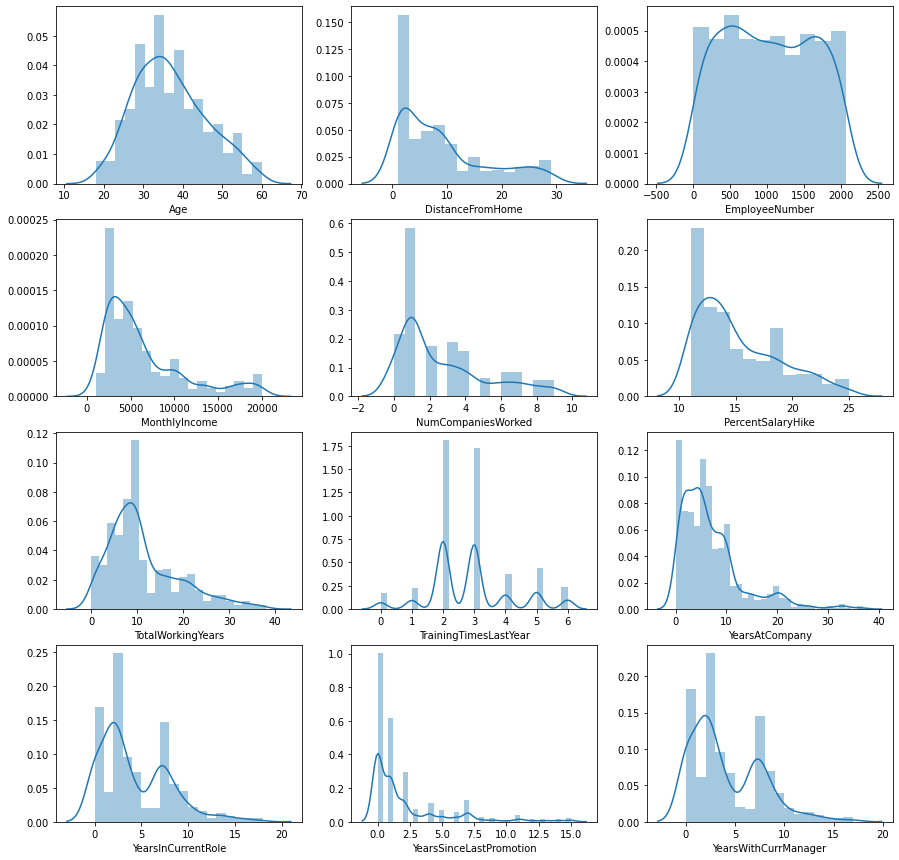

In [15]:
fig, ax = plt.subplots(4, 3, figsize= (15, 15))
for feature, ax in zip(continuous_variables, fig.axes):
    sns.distplot(train[feature], ax= ax)

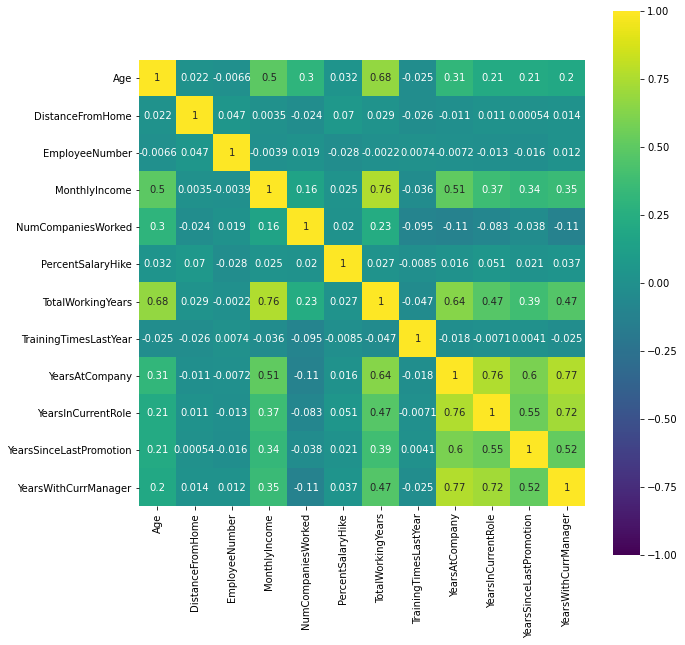

In [16]:
plt.figure(figsize= (10, 10))
sns.heatmap(train[continuous_variables].corr(), vmin= -1, vmax= 1, annot= True, square= True, cmap= "viridis")

- **We have to remove highly correlated variables. Let's remove TotalWorkingYears, YearsInCurrentRole, YearsWithCurrentManager and YearsSinceLastPromotion.**

In [17]:
def cont_cols_plot(feature):
    fig, ax = plt.subplots(1, 3, figsize= (15, 4))
    sns.distplot(train[train.Attrition == 0][feature], color = "blue", ax= ax[0])
    sns.distplot(train[train.Attrition == 1][feature], color = "darkred", ax= ax[0])
    
    sns.boxplot(x= "Attrition", y= feature, data= train, ax= ax[1])
    sns.pointplot(x= "Attrition", y= feature, data= train, ax= ax[2])
    
    plt.show()

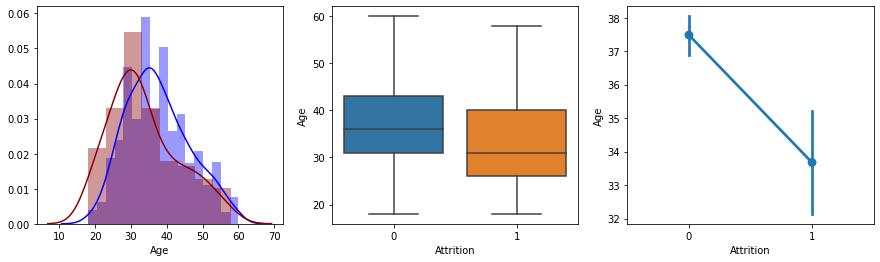

--------------------------------------------------


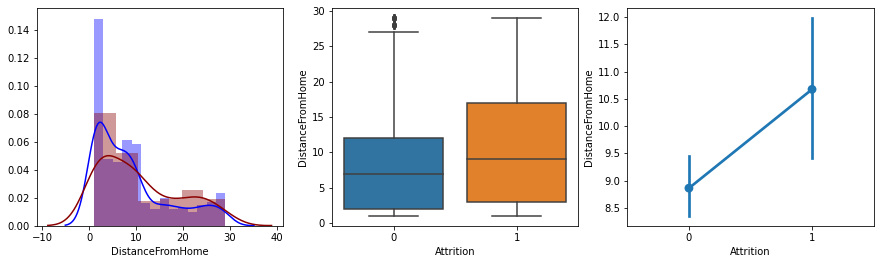

--------------------------------------------------


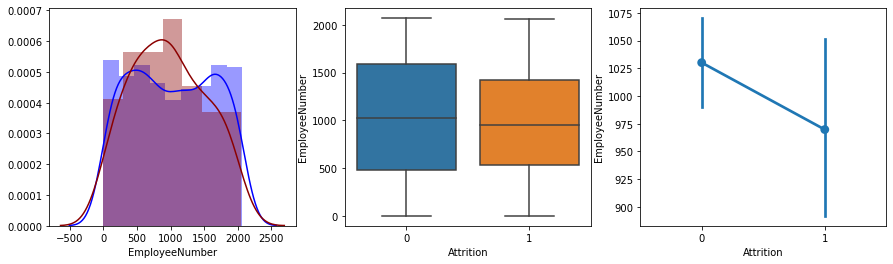

--------------------------------------------------


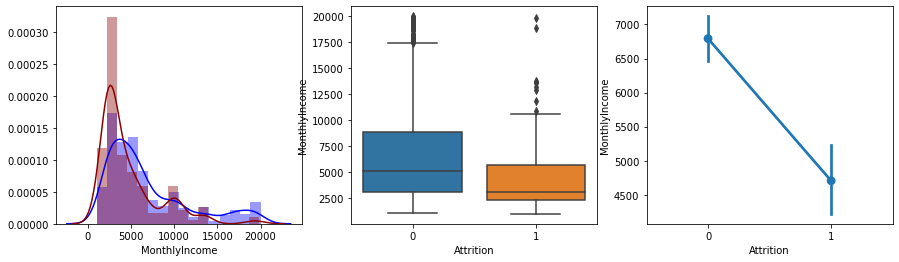

--------------------------------------------------


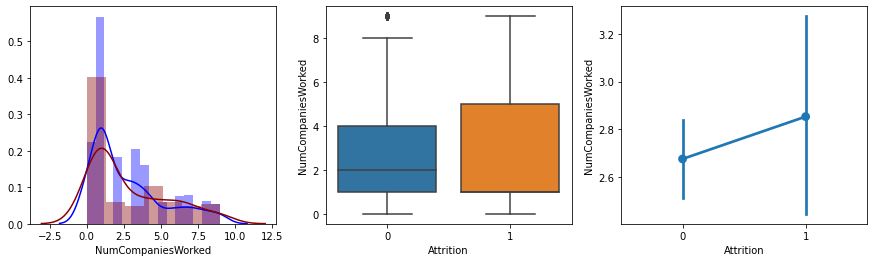

--------------------------------------------------


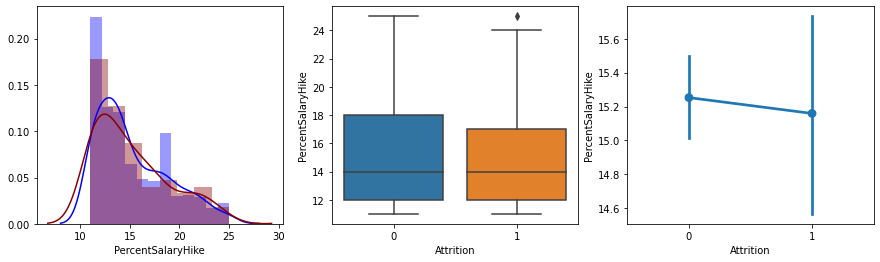

--------------------------------------------------


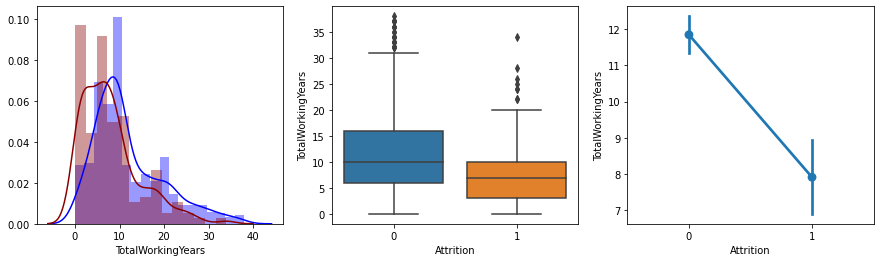

--------------------------------------------------


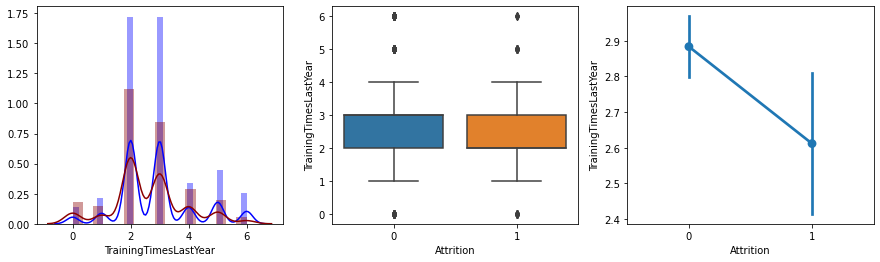

--------------------------------------------------


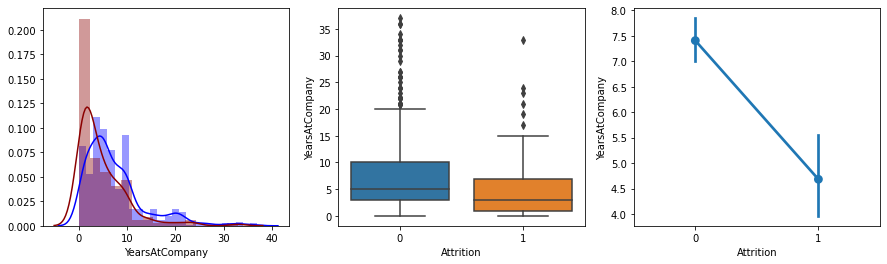

--------------------------------------------------


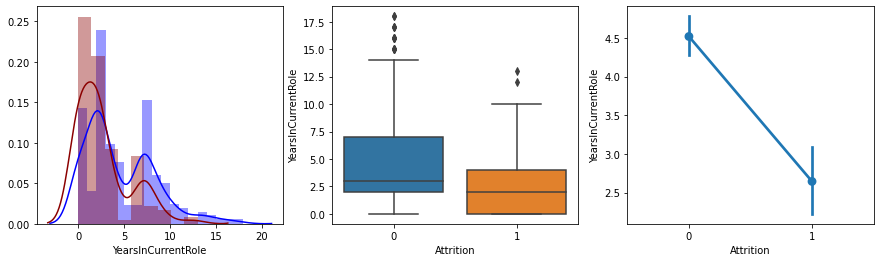

--------------------------------------------------


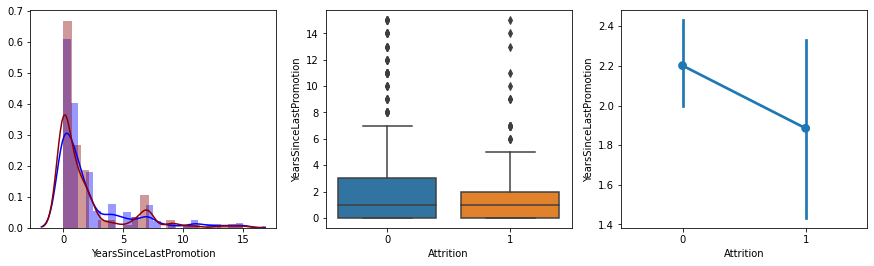

--------------------------------------------------


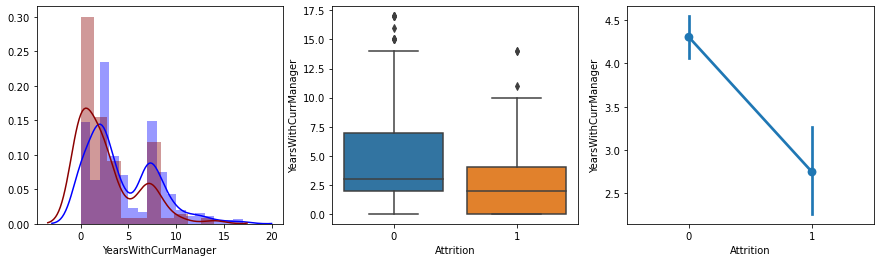

--------------------------------------------------


In [18]:
for i in continuous_variables:
    cont_cols_plot(i)
    print ("-"*50)


In [19]:
from scipy.stats import ttest_ind

ttest_pvalue = pd.DataFrame(index= continuous_variables, columns= ["p_value"])

for feature in continuous_variables:
    ttest = ttest_ind(train[train.Attrition ==0][feature], train[train.Attrition == 1][feature], equal_var= False)
    ttest_pvalue.loc[feature, "p_value"] = ttest[1]
    
ttest_pvalue["p_value < 0.05"] = ttest_pvalue.apply(lambda x: x < 0.05)
ttest_pvalue

,p_value,p_value < 0.05
Age,8.83982e-06,True
DistanceFromHome,0.0143355,True
EmployeeNumber,0.21801,False
MonthlyIncome,4.28783e-10,True
NumCompaniesWorked,0.43689,False
PercentSalaryHike,0.774322,False
TotalWorkingYears,1.31738e-10,True
TrainingTimesLastYear,0.0141178,True
YearsAtCompany,1.11657e-08,True
YearsInCurrentRole,7.93218e-12,True


- We will remove EmployeeNumber, NumCompaniesWorked, PercentSalaryHike, YearsSinceLastPromotion

## Categorical features

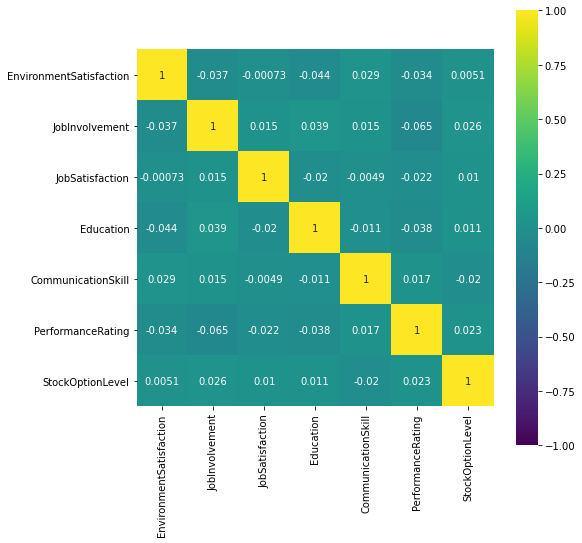

In [20]:
import seaborn as sns
plt.figure(figsize= (8, 8))
sns.heatmap(train[ordinal_variables].corr(method= "kendall"), vmin= -1, vmax= 1, square= True, cmap= "viridis", annot= True) 

In [21]:
train[ordinal_variables].nunique()

EnvironmentSatisfaction    4
JobInvolvement             4
JobSatisfaction            4
Education                  5
CommunicationSkill         5
PerformanceRating          2
StockOptionLevel           4
dtype: int64

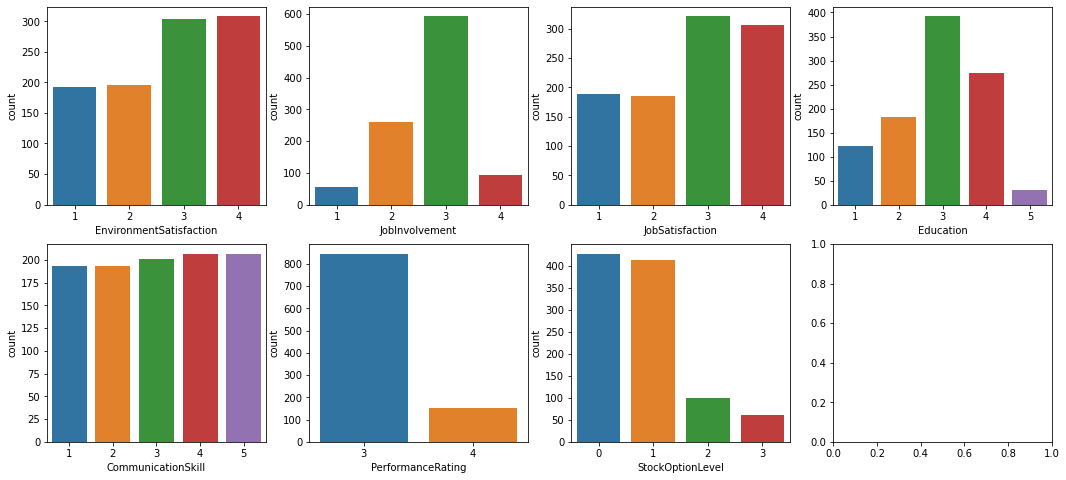

In [22]:
fig, ax = plt.subplots(2, 4, figsize= (18, 8))
for feature, ax in zip(ordinal_variables, fig.axes):
    sns.countplot(x= feature, data= train, ax= ax)

In [23]:
def ordinal_cols_plot(feature):
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    sns.countplot(x= feature, hue= "Attrition", data= train, ax= ax[0])
    
    cross = pd.crosstab(index= train[feature], columns= train.Attrition, normalize= "index")
    sns.pointplot(x= cross.index, y= cross[1]*100, ax= ax[1])
    plt.ylabel("Attrition Percentage")
    
    print (cross)
    plt.show()

Attrition                       0         1
EnvironmentSatisfaction                    
1                        0.765625  0.234375
2                        0.862245  0.137755
3                        0.855263  0.144737
4                        0.866883  0.133117


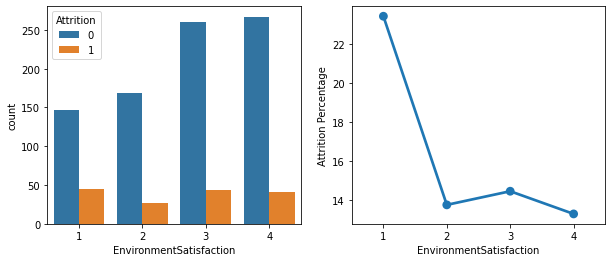

----------------------------------------------------------------------------------------------------
Attrition              0         1
JobInvolvement                    
1               0.666667  0.333333
2               0.818533  0.181467
3               0.860034  0.139966
4               0.904255  0.095745


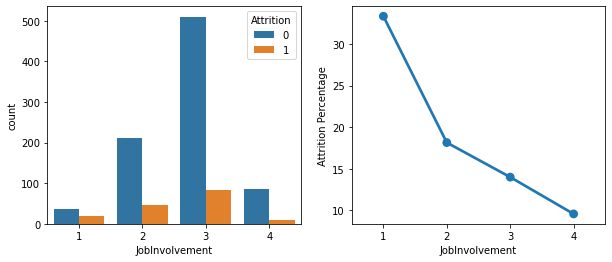

----------------------------------------------------------------------------------------------------
Attrition               0         1
JobSatisfaction                    
1                0.776596  0.223404
2                0.832432  0.167568
3                0.838006  0.161994
4                0.895425  0.104575


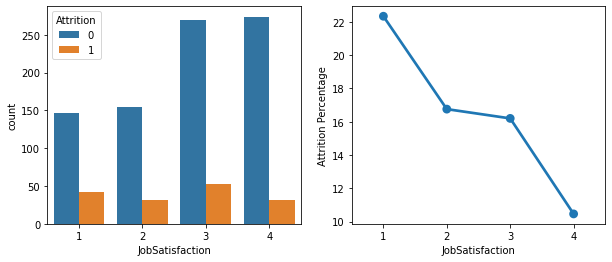

----------------------------------------------------------------------------------------------------
Attrition         0         1
Education                    
1          0.834711  0.165289
2          0.829670  0.170330
3          0.839286  0.160714
4          0.854015  0.145985
5          0.903226  0.096774


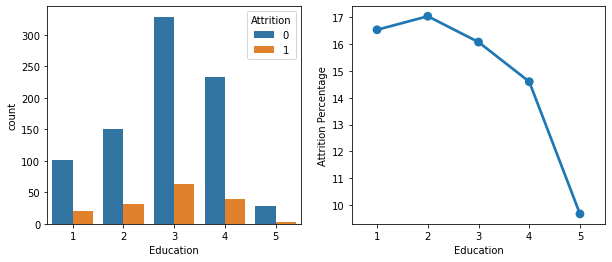

----------------------------------------------------------------------------------------------------
Attrition                  0         1
CommunicationSkill                    
1                   0.896373  0.103627
2                   0.829016  0.170984
3                   0.860697  0.139303
4                   0.834951  0.165049
5                   0.797101  0.202899


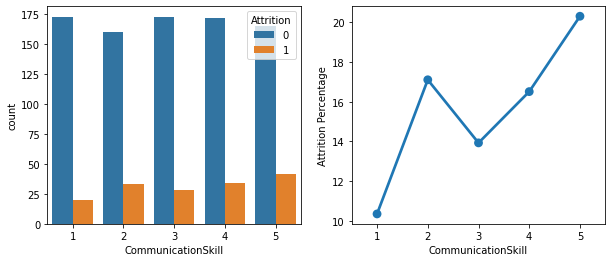

----------------------------------------------------------------------------------------------------
Attrition                 0         1
PerformanceRating                    
3                  0.844156  0.155844
4                  0.836601  0.163399


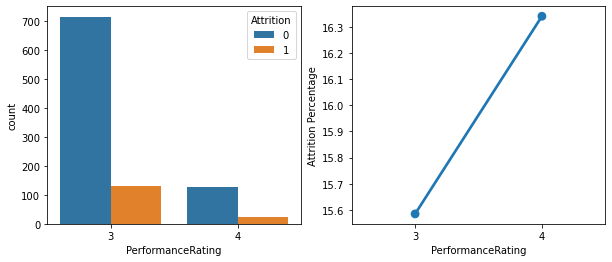

----------------------------------------------------------------------------------------------------
Attrition                0         1
StockOptionLevel                    
0                 0.761682  0.238318
1                 0.912833  0.087167
2                 0.909091  0.090909
3                 0.833333  0.166667


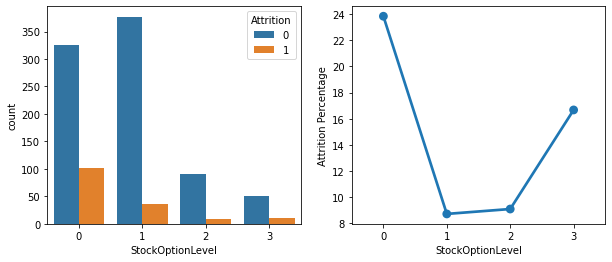

----------------------------------------------------------------------------------------------------


In [24]:
for i in ordinal_variables:
    ordinal_cols_plot(i)
    print ("--"*50)

In [25]:
train[nominal_variables].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

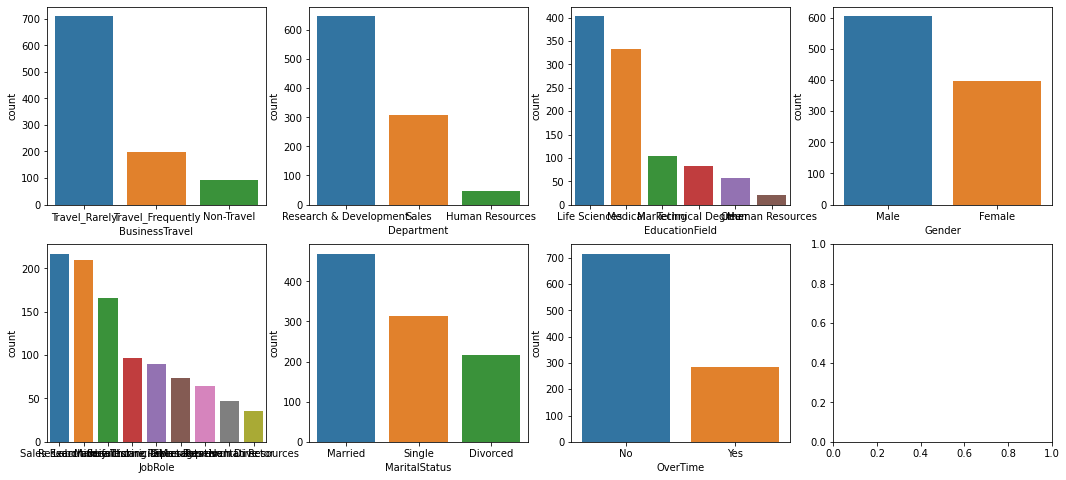

In [26]:
fig, ax = plt.subplots(2, 4, figsize= (18, 8))
for feature, ax in zip(nominal_variables, fig.axes):
    sns.countplot(x= feature, data= train, ax= ax, order= train[feature].value_counts().index)

In [27]:
def nominal_cols_plot(feature):
    fig, ax = plt.subplots(1, 2, figsize = (10, 4))
    sns.countplot(x= feature, hue= "Attrition", data= train, ax= ax[0], order = train[feature].value_counts().index)
    
    cross = pd.crosstab(index= train[feature], columns= train.Attrition, normalize= "index")
    sns.pointplot(x= cross.index, y= cross[1]*100, ax= ax[1], order = train[feature].value_counts().index)
    plt.ylabel("Attrition Percentage")
    
    print (cross)
    plt.show()

Attrition                 0         1
BusinessTravel                       
Non-Travel         0.923913  0.076087
Travel_Frequently  0.743719  0.256281
Travel_Rarely      0.860367  0.139633


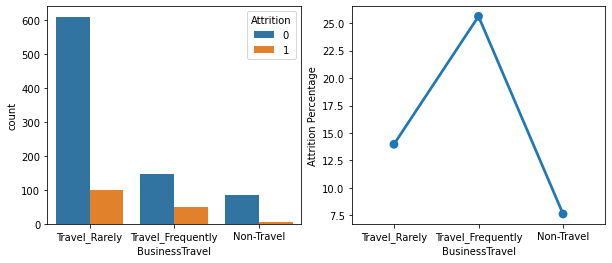

--------------------------------------------------
Attrition                      0         1
Department                                
Human Resources         0.800000  0.200000
Research & Development  0.871716  0.128284
Sales                   0.788961  0.211039


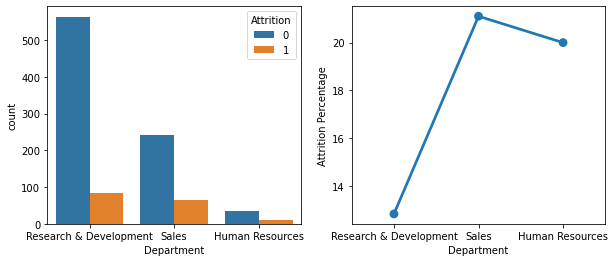

--------------------------------------------------
Attrition                0         1
EducationField                      
Human Resources   0.750000  0.250000
Life Sciences     0.863524  0.136476
Marketing         0.780952  0.219048
Medical           0.858859  0.141141
Other             0.877193  0.122807
Technical Degree  0.756098  0.243902


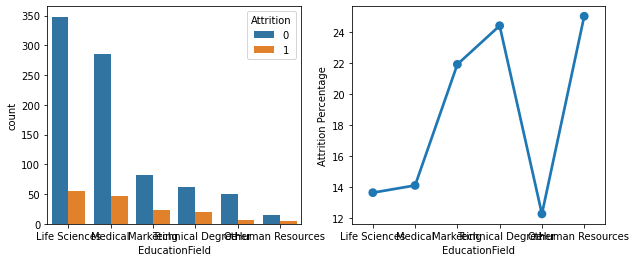

--------------------------------------------------
Attrition         0         1
Gender                       
Female     0.851010  0.148990
Male       0.837748  0.162252


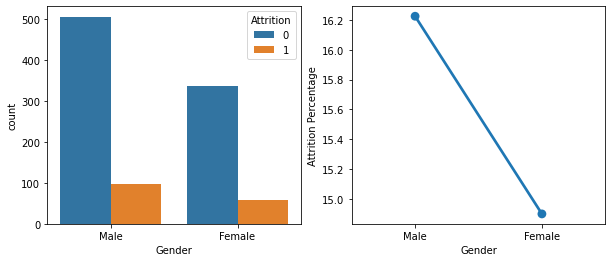

--------------------------------------------------
Attrition                         0         1
JobRole                                      
Healthcare Representative  0.944444  0.055556
Human Resources            0.750000  0.250000
Laboratory Technician      0.783133  0.216867
Manager                    0.945946  0.054054
Manufacturing Director     0.938144  0.061856
Research Director          1.000000  0.000000
Research Scientist         0.842105  0.157895
Sales Executive            0.829493  0.170507
Sales Representative       0.578125  0.421875


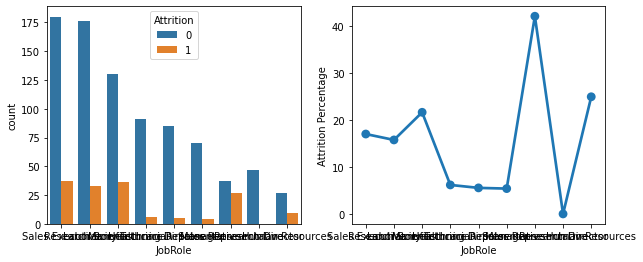

--------------------------------------------------
Attrition             0         1
MaritalStatus                    
Divorced       0.884793  0.115207
Married        0.886994  0.113006
Single         0.748408  0.251592


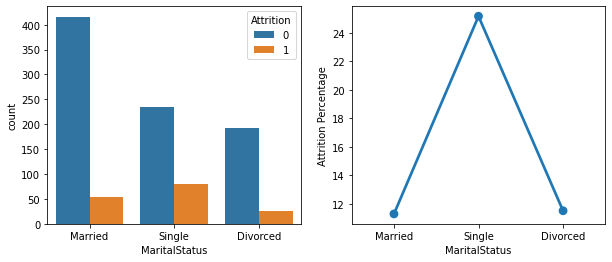

--------------------------------------------------
Attrition         0         1
OverTime                     
No         0.900838  0.099162
Yes        0.697183  0.302817


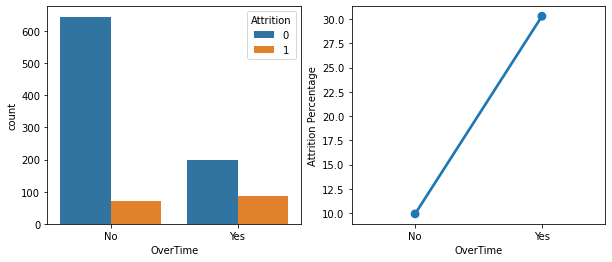

--------------------------------------------------


In [28]:
for i in nominal_variables:
    nominal_cols_plot(i)
    print ("-"*50)

Attrition                0         1
EducationField                      
Human Resources   0.750000  0.250000
Life Sciences     0.863524  0.136476
Marketing         0.780952  0.219048
Medical           0.858859  0.141141
Other             0.877193  0.122807
Technical Degree  0.756098  0.243902


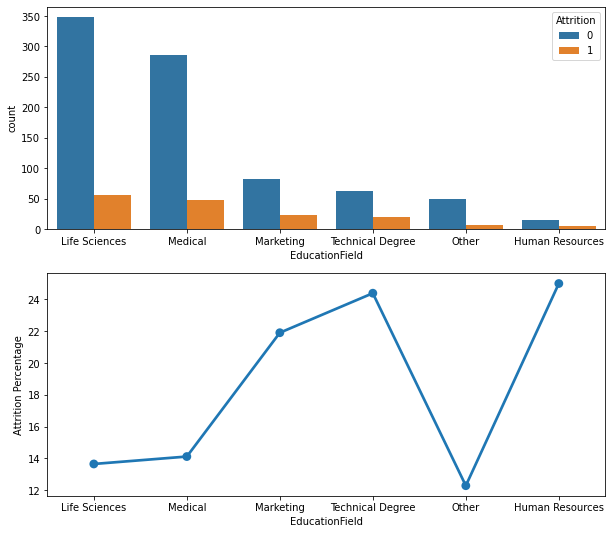

In [29]:
fig, ax = plt.subplots(2, 1, figsize = (10, 9))
sns.countplot(x= "EducationField", hue= "Attrition", data= train, ax= ax[0], order= train.EducationField.value_counts().index)
    
cross = pd.crosstab(index= train.EducationField, columns= train.Attrition, normalize= "index")
sns.pointplot(x= cross.index, y= cross[1]*100, ax= ax[1], order= train.EducationField.value_counts().index)
plt.ylabel("Attrition Percentage")

print (cross)
plt.show()

Attrition                         0         1
JobRole                                      
Healthcare Representative  0.944444  0.055556
Human Resources            0.750000  0.250000
Laboratory Technician      0.783133  0.216867
Manager                    0.945946  0.054054
Manufacturing Director     0.938144  0.061856
Research Director          1.000000  0.000000
Research Scientist         0.842105  0.157895
Sales Executive            0.829493  0.170507
Sales Representative       0.578125  0.421875


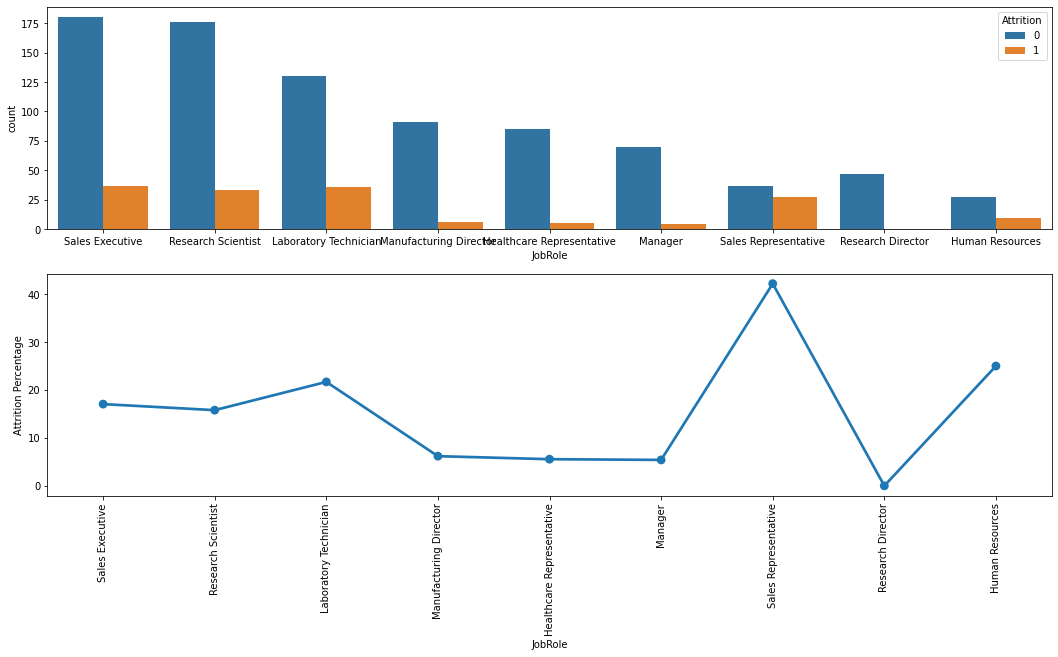

In [30]:
fig, ax = plt.subplots(2, 1, figsize = (18, 9))
sns.countplot(x= "JobRole", hue= "Attrition", data= train, ax= ax[0], order = train.JobRole.value_counts().index)
    
cross = pd.crosstab(index= train.JobRole, columns= train.Attrition, normalize= "index")
sns.pointplot(x= cross.index, y= cross[1]*100, ax= ax[1], order = train.JobRole.value_counts().index)
plt.ylabel("Attrition Percentage")
plt.xticks(rotation= 90)

print (cross)
plt.show()

In [31]:
a = ordinal_variables + nominal_variables
from scipy.stats import chi2_contingency

chi2_pvalue = pd.DataFrame(index= a, columns= ["p_value"])
for feature in a:
    cross = pd.crosstab(index= train[feature], columns= train.Attrition)
    chi2 = chi2_contingency(cross)
    
    chi2_pvalue.loc[feature, "p_value"] = chi2[1]

chi2_pvalue["p_value < 0.05"] = chi2_pvalue.apply(lambda x: x < 0.05)   
chi2_pvalue    

,p_value,p_value < 0.05
EnvironmentSatisfaction,0.0122428,True
JobInvolvement,0.000478464,True
JobSatisfaction,0.0050086,True
Education,0.835679,False
CommunicationSkill,0.0808415,False
PerformanceRating,0.907922,False
StockOptionLevel,1.11276e-08,True
BusinessTravel,2.77155e-05,True
Department,0.00325452,True
EducationField,0.0429992,True


- **We will drop Education, CommunicationSkill, PerformanceRating and Gender.**

In [32]:
features_to_drop = ["EmployeeNumber", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", 
                    "YearsInCurrentRole", "YearsWithCurrManager", "YearsSinceLastPromotion", 
                    "Education", "CommunicationSkill", "PerformanceRating", "Gender"]
len(features_to_drop)

11

# Model Building

In [33]:
train_dropped = train.drop(features_to_drop, axis= "columns").copy()
test_dropped = test.drop(features_to_drop, axis= "columns").copy()

In [34]:
Id = test_dropped.pop("Id")
y = train_dropped.pop("Attrition")

In [35]:
train_dropped.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsAtCompany'],
      dtype='object')

In [36]:
nominal_cols = train_dropped.select_dtypes(include= "object").columns.tolist()
ordinal_cols = [i for i in ordinal_variables if i in train_dropped.columns]
nominal_cols + ordinal_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'StockOptionLevel']

In [37]:
cat_index = [train_dropped.columns.get_loc(i) for i in nominal_cols + ordinal_cols]
cat_index

[1, 2, 4, 7, 9, 11, 5, 6, 8, 12]

In [38]:
train_dropped[nominal_cols].head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
Id,,,,,,
1,Non-Travel,Research & Development,Medical,Laboratory Technician,Single,No
2,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,Yes
3,Travel_Rarely,Sales,Medical,Sales Executive,Single,No
4,Travel_Rarely,Research & Development,Life Sciences,Research Scientist,Single,No
5,Travel_Rarely,Research & Development,Other,Manufacturing Director,Married,No


In [39]:
le = LabelEncoder()

for i in nominal_cols:
    train_dropped[i] = le.fit_transform(train_dropped[i])
    print (le.classes_)
    test_dropped[i] = le.transform(test_dropped[i])
    

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [40]:
train_dropped[nominal_cols].head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
Id,,,,,,
1,0,1,3,2,2,0
2,2,1,1,4,1,1
3,2,2,3,7,2,0
4,2,1,1,6,2,0
5,2,1,4,4,1,0


In [41]:
y.value_counts()

0    843
1    157
Name: Attrition, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTENC

In [43]:
sm = SMOTENC(categorical_features = np.asarray(cat_index), random_state= 5)
X_train_res, y_train_res = sm.fit_sample(train_dropped, y)
y_train_res.value_counts()

1    843
0    843
Name: Attrition, dtype: int64

In [44]:
X_train_res.shape

(1686, 15)

In [45]:
skf= StratifiedKFold(n_splits=5, shuffle= False, random_state= 5)

In [46]:
def model_accuracy(model, param_grid):
    classifier = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    grid= GridSearchCV(estimator= classifier, param_grid= param_grid, cv= skf, scoring= "roc_auc")
    grid.fit(X_train_res, y_train_res)
    
    print ("Best_score: ", grid.best_score_, "\n", "Best_params: ", grid.best_params_)
    return (pd.DataFrame(grid.cv_results_)
            .sort_values(["rank_test_score"])[["params", "mean_test_score", "std_test_score"]].head(10).T)

In [47]:
model_accuracy(SVC(), param_grid= { "model__C": [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], "model__gamma": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]})

Best_score:  0.9305097193809073 
 Best_params:  {'model__C': 5, 'model__gamma': 0.1}


,39,46,33,45,47,40,54,61,38,53
params,"{'model__C': 5, 'model__gamma': 0.1}","{'model__C': 10, 'model__gamma': 0.1}","{'model__C': 1, 'model__gamma': 0.5}","{'model__C': 10, 'model__gamma': 0.05}","{'model__C': 10, 'model__gamma': 0.5}","{'model__C': 5, 'model__gamma': 0.5}","{'model__C': 50, 'model__gamma': 0.5}","{'model__C': 100, 'model__gamma': 0.5}","{'model__C': 5, 'model__gamma': 0.05}","{'model__C': 50, 'model__gamma': 0.1}"
mean_test_score,0.93051,0.92631,0.924779,0.923181,0.92257,0.92257,0.92257,0.92257,0.921111,0.920723
std_test_score,0.055772,0.0557728,0.0594794,0.0567312,0.062548,0.062548,0.062548,0.062548,0.0562803,0.0552165


In [48]:
model_accuracy(LogisticRegression(penalty= "l1", solver= "liblinear"), param_grid= {"model__C": [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]})

Best_score:  0.8692471918917072 
 Best_params:  {'model__C': 10}


,6,7,8,5,4,3,2,1,0
params,{'model__C': 10},{'model__C': 50},{'model__C': 100},{'model__C': 5},{'model__C': 1},{'model__C': 0.5},{'model__C': 0.1},{'model__C': 0.05},{'model__C': 0.01}
mean_test_score,0.869247,0.869233,0.869226,0.869219,0.869206,0.869079,0.868569,0.867468,0.840753
std_test_score,0.0395155,0.0394722,0.039487,0.039575,0.0397726,0.039967,0.0414083,0.0433,0.0603616


In [49]:
final_svm = Pipeline(steps= [
    ("scaler", StandardScaler()),
    ("model", SVC(C= 5, gamma= 0.1, probability= True))
])

final_svm.fit(X_train_res, y_train_res)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=5, gamma=0.1, probability=True))])

In [50]:
predictions = final_svm.predict_proba(test_dropped)[:, 1]
predictions[:5]

array([0.09523977, 0.27722237, 0.02419767, 0.00399367, 0.03787378])

In [51]:
output = pd.DataFrame({"Id": Id,
                       "Attrition": predictions})
output.head()

,Id,Attrition
0,1,0.095240
1,2,0.277222
2,3,0.024198
3,4,0.003994
4,5,0.037874


In [52]:
output.to_csv("submission.csv", index= False)